## Final Project Submission

Please fill out:
* Student name: Curtis Kariuki
* Student pace: Part time 
* Scheduled project review date/time: 24th July 2023
* Instructor name: Asha Deen
* Blog post URL:


In this project I am going to tackle how Microsoft(the business) is going to generate revenue from the analysis using the 3 files:
1. imdb.title.basics
2. imdb.title.ratings
3. bom.movie_gross

                                DATA ANALYSIS OF BORN.MOVIE.CSV

                                      Loading the dataset

In [1]:
# This is used for just ensuring that pandas is installed in the notebook
!pip install pandas

In [2]:
# Fist we import the necessary libraries needed to conduct the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [3]:
# We extract the file that we need to analyse
df = pd.read_csv('C:/Users/Admin/documents/flatiron/phase_one/projo/bom.movie_gross.csv')

In [4]:
# We try to see if the file can open the first 5 rows
df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# We try to see the last 5 rows
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


                                     Exploring the data

In [6]:
# This is used ti check the rows and columns
df.shape

(3387, 5)

In [7]:
# This is used for showing column names
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [8]:
# This is for checking the overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Now that we have an overview of how the data looks like we can start the data cleaning process

                                                 DATA CLEANING

We are now going to check the missing values in the dataset

In [9]:
# This is used to check the missing values
miss_values = df.isna()
miss_values

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [10]:
# This allows us to know the total number of missing values in the data set
miss_values_sum = df.isna().sum()
miss_values_sum

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

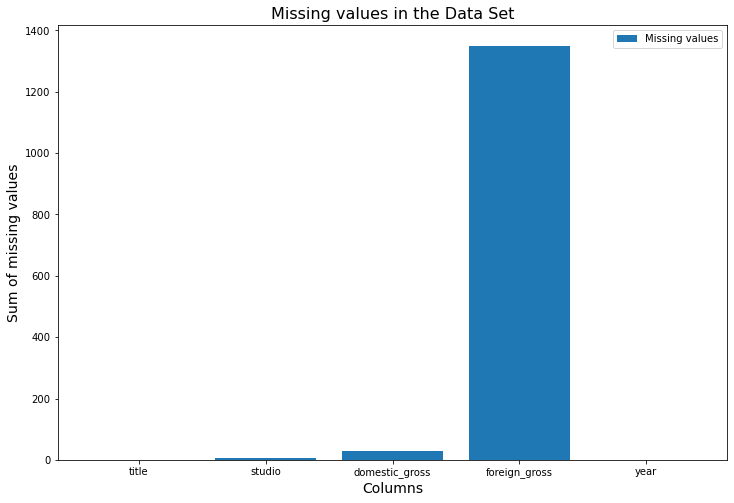

In [11]:
# We have to assign the x and y axis
# The x is used for getting the column names 
# the y is used for getting the sum of missing values
x = miss_values_sum.index
y = miss_values_sum.values

# We adjust the figure of the graph
plt.figure(figsize = (12,8))

# We use the code below to create a bar chart
plt.bar(x, y, label = 'Missing values')

# This is used to label the x and y axis
plt.xlabel('Columns', fontsize = 14)
plt.ylabel('Sum of missing values', fontsize = 14)

# This is used for giving the the chart a name
plt.title('Missing values in the Data Set', fontsize = 16)
plt.legend()

# This is to display the output
plt.show()

As we can see the column foreign gross has the most amount of missing values with a total of 1350 while the column studio has the least amount with a total of 5. But columns like title and year have no missing value

Now we are going to put them in percentage in order to know how we are going to handle the missing values

In order to do this we have to create a function so that we don't keep re-writing the code and the put in a loop so that it ittarates the columns thus enabling us to get the percentage

In [12]:
# Here we will use a function
def missing_values(data): 
    # data is used to refrence the data set we are using

    # Here we are still adding the total missing values in each column
    # Also arranging it in a descending manner/order thus the "false" meaning in descending order
    # In refrence to the other code used to find missing values its the same just the variables are different
    missing = data.isnull().sum().sort_values(ascending = False)
    # The code in refrence is 'miss_values_sum = df.isna().sum()'

    # Here we start calculating the percentage of missing values and the code above is used in the calculation
    percentage_missing = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # Then we store the missing value in a dataframe so that loopoing can be done in an easier manner
    values_missing = pd.DataFrame({"Missing Values": missing, "Percentage": percentage_missing}).reset_index()

    # In this we remove any columns that have no missing values because they will no very much relevant
    values_missing.drop(values_missing[values_missing["Percentage"] == 0].index, inplace = True)

    return values_missing

# Now we call out the variable data_missing used to represent the function to obtain desired output
data_missing = missing_values(df)
print(data_missing)



            index  Missing Values  Percentage
0   foreign_gross            1350    0.398583
1  domestic_gross              28    0.008267
2          studio               5    0.001476


Now we can see the percentages of the missing data

Now we are going to plot a graph to show this

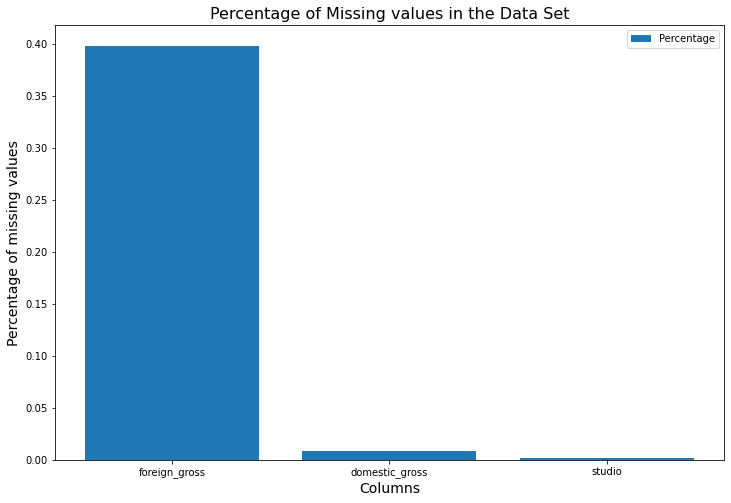

In [13]:
# We have to assign the x and y axis
x = data_missing['index']
y = data_missing['Percentage']

# We adjust the figure of the graph
plt.figure(figsize = (12,8))

# We use the code below to create a bar chart
plt.bar(x, y, label = 'Percentage')

# This is used to label the x and y axis
plt.xlabel('Columns', fontsize = 14)
plt.ylabel('Percentage of missing values', fontsize = 14)

# This is used for giving the the chart a name
plt.title('Percentage of Missing values in the Data Set', fontsize = 16)
plt.legend()

# This is to display the output
plt.show()

As we can see the percentage of missing data from each column.

Now we are going to start dealing with missing data from the least as we move upwards

For studio and domestic rows that have missing data we are going to drop them due to their percentage of missing data being low and cannot fill them with inaccurate data when real life application is applied

In [14]:
# This is for dropping the studio rows 
# The inplace = True  is used for modifying the original DataFrame without creating a new one
df.dropna(axis = 0, subset = ['studio'], inplace = True)

In [15]:
missing_values(df)

,index,Missing Values,Percentage
0,foreign_gross,1349,0.398876
1,domestic_gross,26,0.007688


Now we will drop rows with the missing values of domestic gross

In [16]:
# This is for dropping the domestic gross rows 
df.dropna(axis = 0, subset = ['domestic_gross'], inplace = True)
missing_values(df)

,index,Missing Values,Percentage
0,foreign_gross,1349,0.401967


We are going to remove the "," in foreign_gross so that it enables to change the data type from string to float because we are dealing with money and it has a tendancy of classfying figures with comas (eg. 14,000 as a string).

In [17]:
# Here we are removing the "," so that we can change the data type
df['foreign_gross'].replace(",", "", inplace = True, regex = True)

In [18]:
# Here we are changing the data type of foreign_gross to float
df['foreign_gross'] = df['foreign_gross'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


Now to deal with the missing data of foreign gross.


In [20]:
# This is for filling the missing data with median in the foreign_gross rows 
clmn_median = df['foreign_gross'].median()
df['foreign_gross'].fillna(clmn_median, inplace = True)

In [21]:
missing_values(df)

,index,Missing Values,Percentage


Now that we have dealt with the missing data we can fix the structual issues

In [22]:
# We create a function that is used to avoid rewriting the code.
def char_rmve(data,cols,characters):
    for col in cols:
        data[col] = data[col].str.strip(characters)
    return data.head(10)

char_rmve(df, ['studio'], './')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
5,The Twilight Saga: Eclipse,Sum,300500000.0,398000000.0,2010
6,Iron Man 2,Par,312400000.0,311500000.0,2010
7,Tangled,BV,200800000.0,391000000.0,2010
8,Despicable Me,Uni,251500000.0,291600000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010


In [23]:
# Here we are removing the "/" between the strings in the studio column
df['studio'].replace("/", "", inplace = True, regex = True)
df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,PDW,238700000.0,513900000.0,2010
5,The Twilight Saga: Eclipse,Sum,300500000.0,398000000.0,2010
6,Iron Man 2,Par,312400000.0,311500000.0,2010
7,Tangled,BV,200800000.0,391000000.0,2010
8,Despicable Me,Uni,251500000.0,291600000.0,2010
9,How to Train Your Dragon,PDW,217600000.0,277300000.0,2010


Now lets see if there are any duplicates in the data set


In [24]:
duplicated_row = df[df.duplicated()]
duplicated_row

,title,studio,domestic_gross,foreign_gross,year


It seems there are no duplicates in the data set.

                                       Outliers

Now we are going to use boxplot inorder to be able to see the outliers and how we will handle them

<AxesSubplot:>

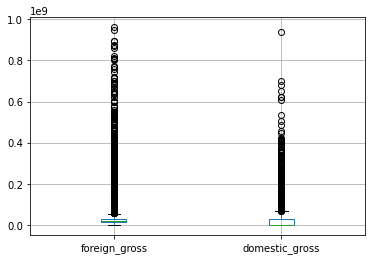

In [25]:
# We are going to plot a box plot to see the outliers
gross_clmns = ['foreign_gross', 'domestic_gross']
df.boxplot(column = gross_clmns)

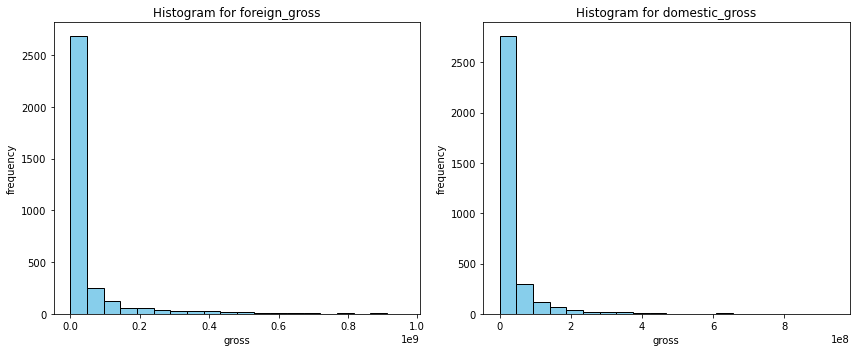

In [26]:
# First we create a figure and axis
fig, axs = plt.subplots(nrows = 1, ncols = len(gross_clmns), figsize = (12, 5))

# We loop through each column so as to plot a histogram
for z, column in enumerate(gross_clmns):
    axs[z].hist(df[column],bins = 20, color = 'skyblue', edgecolor = 'black')
    axs[z].set_xlabel('gross')
    axs[z].set_ylabel('frequency')
    axs[z].set_title(f'Histogram for {column}')

# Adjusting space between subplots for a better output
plt.tight_layout()
# To display the histogram
plt.show()

Now we want to draw conclusions from the following analysis that are going to be presented to the board

We want to see the percentage of foreign_gross and how it affects the international market of Box office

In [27]:
# Now we are going first to calculate the total revenuein each colum
total_foreign_gross = df['foreign_gross'].sum()
total_domestic_gross = df['domestic_gross'].sum()
total_revenue_gross = total_foreign_gross + total_domestic_gross

# Now that we have total_gross we are going to get percentage of each column
percent_foreign = (total_foreign_gross / total_revenue_gross) * 100
percent_domestic = (total_domestic_gross / total_revenue_gross) * 100

# Now to display the output
print("Percentage of 'foreign_gross'column:") 
print(percent_foreign)

print("\nPercentage of 'domestic_gross'column:")
print(percent_domestic)


Percentage of 'foreign_gross'column:
64.86775476661535

Percentage of 'domestic_gross'column:
35.13224523338465


Now we want to round the figures before plotting a chart to present them

In [28]:
percent_foreign_rd = round(percent_foreign, 2)
percent_domestic_rd = round(percent_domestic, 2)

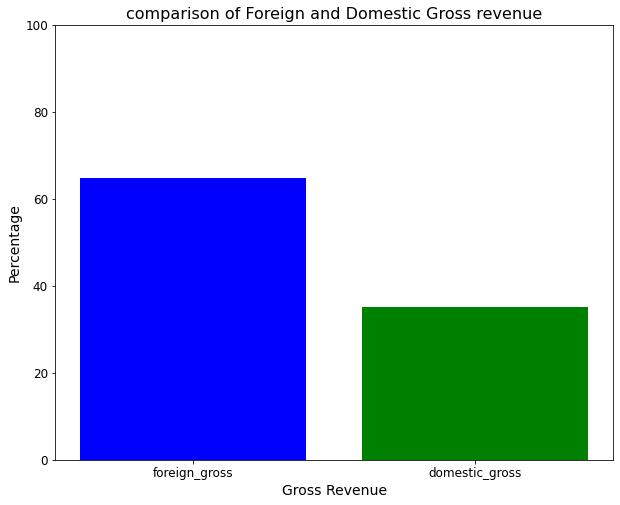

In [29]:
# Now we are going to plot the graph
# Now we are going to create a DataFrame to hold the percentages and labels
plt.figure(figsize = (10, 8))
plt.bar(['foreign_gross','domestic_gross'], [percent_foreign, percent_domestic], color = ['blue', 'green'])

# Now we label the axis
plt.xlabel('Gross Revenue', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.title('comparison of Foreign and Domestic Gross revenue', fontsize = 16)

# Set the y axis limit to 100%
plt.ylim(0, 100)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Now we display the output
plt.show()

The bar chart anove is used to show the percntageof each of the gross revenue and how much the foreign_revenue is higher than the domestic_gross.

In [34]:
# Now we are group the dataframe by studio
# Also the sum of foreign_gross and sum of domestic_gross of each studio
studio_rvenue = df.groupby('studio')[['foreign_gross', 'domestic_gross']].sum()

# Now we calculate total revenue for each studio
studio_rvenue['total_revenue'] = studio_rvenue['foreign_gross'] + studio_rvenue['domestic_gross']

# Now we find the top 5 studios arranging them in descending order
top_studios = studio_rvenue.sort_values(by = 'total_revenue', ascending = False).head(5)

# Now display the output
print(top_studios)

        foreign_gross  domestic_gross  total_revenue
studio                                              
BV       2.583265e+10    1.841903e+10   4.425168e+10
Fox      2.009467e+10    1.094950e+10   3.104417e+10
WB       1.886190e+10    1.216805e+10   3.102995e+10
Uni      1.691297e+10    1.290239e+10   2.981536e+10
Sony     1.402284e+10    8.459683e+09   2.248252e+10


Now we are going to plot a bar graph using seaborn in order to show the studio that generated the most amount of money in the industry

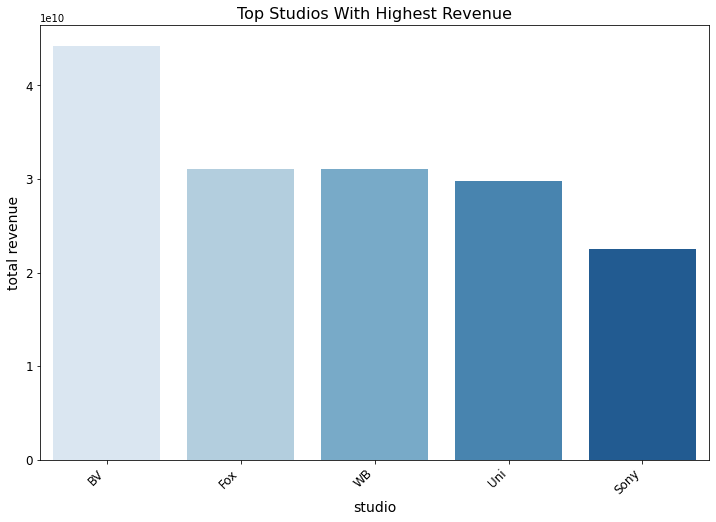

In [38]:
# Now we are going to plot a bar graph
plt.figure(figsize = (12, 8))
sns.barplot(x = top_studios.index, y = 'total_revenue', data = top_studios, palette = 'Blues')
                      
# Now we plot the axis, title and the ticks                      
plt.xlabel('studio', fontsize = 14)
plt.ylabel('total revenue', fontsize = 14)
plt.title('Top Studios With Highest Revenue', fontsize = 16)
plt.xticks(fontsize = 12, rotation = 45 , ha = 'right')
plt.yticks(fontsize = 12)
plt.show()

From the bar chart above we can see BV Studios has the highest amount of revenue generated.

# Conclusion

We can conclude the following from the analysis:    
1. That from the histogram we can conclude that foreign_gross and domestic_gross have almost similar patterns.     
2. That from the bar graph of comaprison of percentages we can see that the foreign_gross contributes higher than domestic_gross with a percentage of 64.87% while the other has 35.13% of the total revenue.

Thus,

We can recommend that:
1. Microsoft makes movies that are going to perform well internationally and thus boost their overall revenue.
2. Microsoft can collaborate with studios like BV and Fox so as to create a movie or film that will bring revenue.

                                DATA ANALYSIS OF TITLE.BASICS.CSV

                                     Loading the dataset

In [1]:
# First we are going to import the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [2]:
# We extract the file that we need to analyse
df = pd.read_csv('C:/Users/Admin/documents/flatiron/phase_one/projo/title.basics.csv')

In [3]:
# We try to see if the file can open the first 5 rows
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
# We try to see the last 5 rows
df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


                                            Exploring the data

In [5]:
# This is used ti check the rows and columns
df.shape

(146144, 6)

In [6]:
# This is used for showing column names
df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [7]:
# This is for checking the overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Now that we have an overview of how the data looks like we can start the data cleaning process

                                                DATA CLEANING

We are now going to check the missing values in the dataset

In [8]:
# This is used to check the missing values
miss_values = df.isna()
miss_values

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
146139,False,False,False,False,False,False
146140,False,False,False,False,True,False
146141,False,False,False,False,True,False
146142,False,False,False,False,False,True


In [9]:
# This allows us to know the total number of missing values in the data set
miss_values_sum = df.isna().sum()
miss_values_sum

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

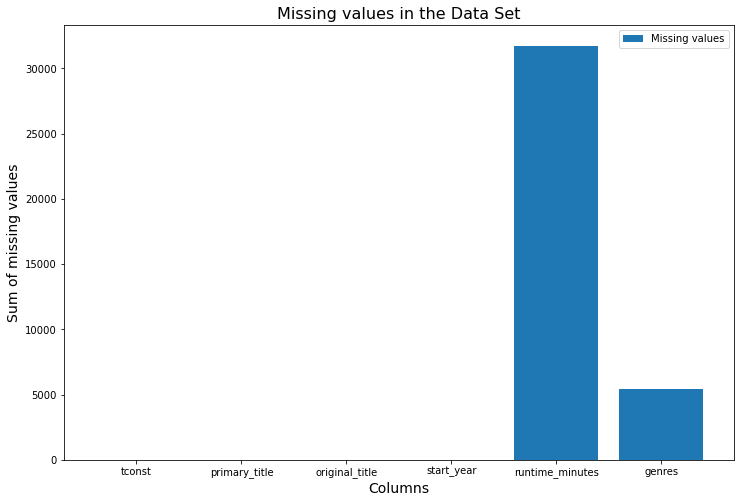

In [10]:
# We have to assign the x and y axis
# The x is used for getting the column names 
# the y is used for getting the sum of missing values
x = miss_values_sum.index
y = miss_values_sum.values

# We adjust the figure of the graph
plt.figure(figsize = (12,8))

# We use the code below to create a bar chart
plt.bar(x, y, label = 'Missing values')

# This is used to label the x and y axis
plt.xlabel('Columns', fontsize = 14)
plt.ylabel('Sum of missing values', fontsize = 14)

# This is used for giving the the chart a name
plt.title('Missing values in the Data Set', fontsize = 16)
plt.legend()

# This is to display the output
plt.show()

Note that in the graph above we cannot see the missing value being shown in the original_title due to it being small thus one must not forget it has missing values

Now we are going to put them in percentage in order to know how we are going to handle the missing values

In order to do this we have to create a function so that we don't keep re-writing the code and the put in a loop so that it ittarates the columns thus enabling us to get the percentage

In [11]:
# Here we will use a function
def missing_values(data): 
    # data is used to refrence the data set we are using

    # Here we are still adding the total missing values in each column
    # Also arranging it in a descending manner/order thus the "false" meaning in descending order
    # In refrence to the other code used to find missing values its the same just the variables are different
    missing = data.isnull().sum().sort_values(ascending = False)
    # The code in refrence is 'miss_values_sum = df.isna().sum()'

    # Here we start calculating the percentage of missing values and the code above is used in the calculation
    percentage_missing = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # Then we store the missing value in a dataframe so that loopoing can be done in an easier manner
    values_missing = pd.DataFrame({"Missing Values": missing, "Percentage": percentage_missing}).reset_index()

    # In this we remove any columns that have no missing values because they will no very much relevant
    values_missing.drop(values_missing[values_missing["Percentage"] == 0].index, inplace = True)

    return values_missing

# Now we call out the variable data_missing used to represent the function to obtain desired output
data_missing = missing_values(df)
print(data_missing)

             index  Missing Values  Percentage
0  runtime_minutes           31739    0.217176
1           genres            5408    0.037005
2   original_title              21    0.000144


Now we can see the percentages of the missing data

Now we are going to plot a graph to show this

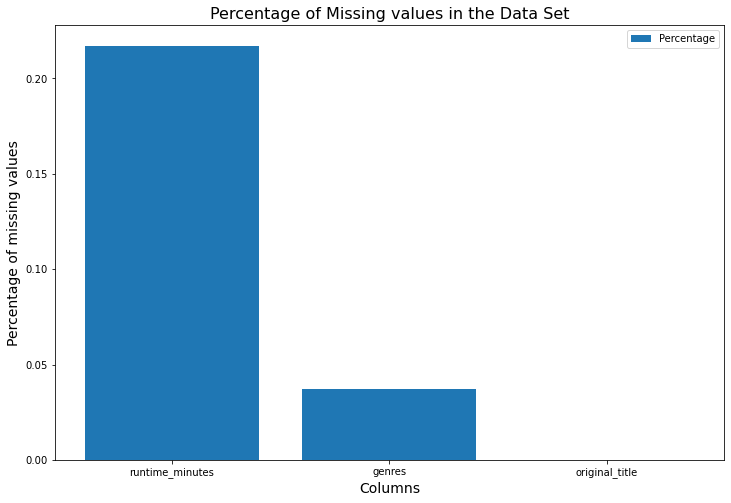

In [12]:
# We have to assign the x and y axis
x = data_missing['index']
y = data_missing['Percentage']

# We adjust the figure of the graph
plt.figure(figsize = (12,8))

# We use the code below to create a bar chart
plt.bar(x, y, label = 'Percentage')

# This is used to label the x and y axis
plt.xlabel('Columns', fontsize = 14)
plt.ylabel('Percentage of missing values', fontsize = 14)

# This is used for giving the the chart a name
plt.title('Percentage of Missing values in the Data Set', fontsize = 16)
plt.legend()

# This is to display the output
plt.show()

Still note that even in this graph there is no visible indicator for missing values for original_title due to it being small

Now we are going to start dealing with missing data from the least as we move upwards

For this instance of data set we are going to drop all rows containing the missing values

In [13]:
# This is for dropping the original_title rows 
# The inplace = True  is used for modifying the original DataFrame without creating a new one
df.dropna(axis = 0, subset = ['original_title'], inplace = True)

In [14]:
missing_values(df)

,index,Missing Values,Percentage
0,runtime_minutes,31722,0.217091
1,genres,5389,0.036880


In [15]:
# This is for dropping the genres rows 
df.dropna(axis = 0, subset = ['genres'], inplace = True)
missing_values(df)

,index,Missing Values,Percentage
0,runtime_minutes,28502,0.202524


In [16]:
# This is for dropping the genres rows 
df.dropna(axis = 0, subset = ['runtime_minutes'], inplace = True)
missing_values(df)

,index,Missing Values,Percentage


Now that we are done with dealing with missing data we are now going to check id there any duplicated in the dataset

In [17]:
duplicated_row = df[df.duplicated()]
duplicated_row

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


It seems there are no duplicates in the data set.

                                               Outliers

Now we are going to use boxplot inorder to be able to see the outliers and how we will handle them

<AxesSubplot:>

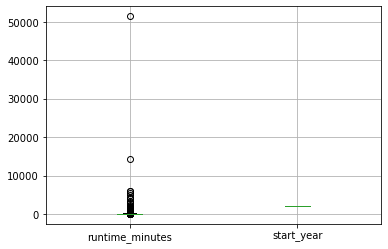

In [18]:
# We are going to plot a box plot to see the outliers
clmns = ['runtime_minutes', 'start_year']
df.boxplot(column = clmns)

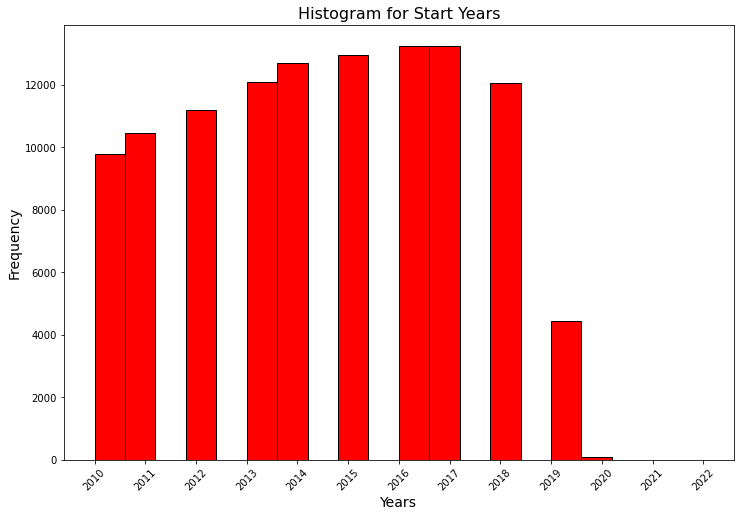

In [40]:
#First we create a figure and axis
fig, axs = plt.subplots(figsize = (12, 8))

#We loop through each column so as to plot a histogram
axs.hist(df['start_year'],bins = 20, color = 'red', edgecolor = 'black')

#Set x-axis ticks to show years 
start_year = df['start_year'].dropna().astype(int)
axs.set_xticks(start_year.unique())
axs.set_xticklabels(start_years.unique(), rotation = 45)

axs.set_xlabel('Years', fontsize = 14)
axs.set_ylabel('Frequency', fontsize = 14)
axs.set_title('Histogram for Start Years', fontsize = 16)

#To display the histogram
plt.show()

The histogram represents the distribution of data in the 'start_year' column.
The height of each bar represents the frequency of data that are falling in that time range.
This enables us to see the partens and trends of outliers and its distribution of movie releases over time.


We are now going to know which genre of shows have been watched often to know which genre should the Microsoft office invest in.

In [36]:
# We group the DataFrame by genre and sum the total
genre_count = df.groupby('genres')['runtime_minutes'].sum()

# Sorting the genres in descending order based on count
most_watched_genres = genre_count.sort_values(ascending = False).head(5)

# We now display the result
most_watched_genres

genres
Documentary     1842001.0
Drama           1492224.0
Comedy           598235.0
Comedy,Drama     306810.0
Horror           253096.0
Name: runtime_minutes, dtype: float64

Now we are going to use seaborn to plot a chart of the above data

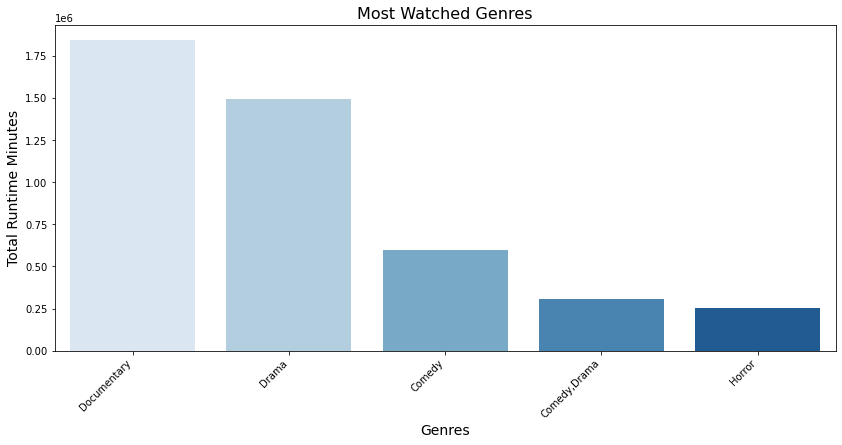

In [39]:
# We are creating a bar plot as we set the size of the figure
plt.figure(figsize = (14, 6))
sns.barplot(x = most_watched_genres.index, y = most_watched_genres.values, palette = 'Blues')
# The palette is for setting the colour

# We will use '.xticks()' in order to rotate the x axis by 45 degrees in order to be readable
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres', fontsize = 14)
plt.ylabel('Total Runtime Minutes', fontsize = 14)
plt.title('Most Watched Genres', fontsize = 16)

# Display the output
plt.show()

# Conclusion

We can conclude the following from the analysis:
 1. That from the histogram the year 2016 and 2017 produced the highest amount of movies.
 2. That from the bar graph of Most watched genres, Documentaries are the most watched genre among the people with total number     of 1,842,001 people.
           
Thus,

We can recommend that:
1. One can focus on producing documentaries as their main production.
2. Also one can diversify their portfolio to target other audiences like creating a genre based on drama due to it being            secondy and comedy being third

                             DATA ANALYSIS OF TITLE.RATINGS.CSV

                                  Loading the dataset

In [1]:
# Fist we import the necessary libraries needed to conduct the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [2]:
# We extract the file that we need to analyse
df = pd.read_csv('C:/Users/Admin/documents/flatiron/phase_one/projo/title.ratings.csv')

In [3]:
# We try to see if the file can open the first 5 rows
df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
# We try to see the last 5 rows
df.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


                                                Exploring the data

In [5]:
# This is used ti check the rows and columns
df.shape

(73856, 3)

In [6]:
# This is used for showing column names
df.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [7]:
# This is for checking the overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


                                                DATA CLEANING

From the analysis above it seems this data doesn't have any missing values.

Due ti the fact that some averagerating are not placed in one decimal place it may bring inaccuracy

In [8]:
# This is going to make the column averagerating to be rounded off to one decimal place
change_column = 'averagerating'
df[change_column] = df[change_column].round(1)
df.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


Now lets see if there any duplicates in the dataset

In [9]:
duplicated_row = df[df.duplicated()]
duplicated_row

,tconst,averagerating,numvotes


It seems there are no duplicates in the data set.

                                                Outliers

Now we are going to use boxplot inorder to be able to see the outliers and how we will handle them

<AxesSubplot:>

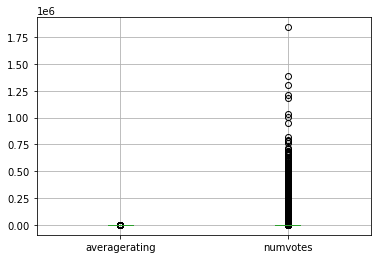

In [10]:
# We are going to plot a box plot to see the outliers
colmns = ['averagerating', 'numvotes']
df.boxplot(column = colmns)

We are now going to plot a histogram to show the frequency of a certain rating

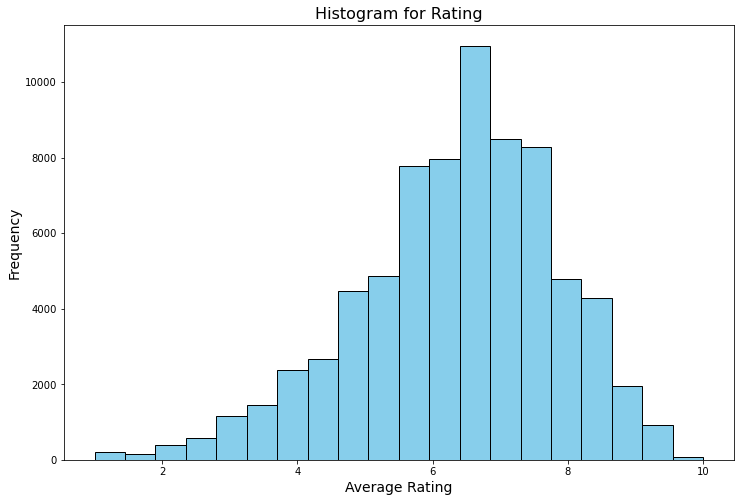

In [15]:
fig, axs = plt.subplots(figsize=(12, 8))

# Plot the histogram
axs.hist(df['averagerating'], bins=20, color='skyblue', edgecolor='black')

# Set labels and title
axs.set_xlabel('Average Rating', fontsize=14)
axs.set_ylabel('Frequency', fontsize=14)
axs.set_title('Histogram for Rating', fontsize=16)

# To display the histogram
plt.show()

We are now going to know which movie had the highest ratings with higher numvotes

In [12]:
# We will set the threshold for number of votes
min_num_votes = 100000

# Then we filter datafram with rows above the threshold
filter_df = df[df['numvotes'] > min_num_votes]

# Then sort the filtered dataframe
top_ratings = filter_df.nlargest(5, 'averagerating')
top_ratings

,tconst,averagerating,numvotes
9643,tt5813916,9.3,100568
59785,tt4154796,8.8,441135
63498,tt1375666,8.8,1841066
24920,tt0816692,8.6,1299334
32118,tt1675434,8.5,677343


We are going to present a chart of the above findings

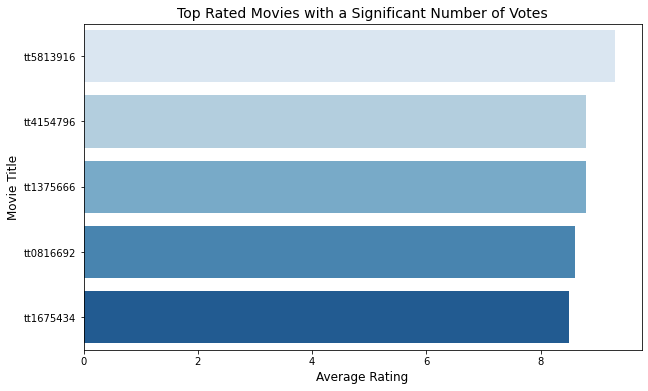

In [13]:
# This code will plot the chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='averagerating', y='tconst', data=top_ratings, palette='Blues')

# We are going to label the axis and title
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Top Rated Movies with a Significant Number of Votes', fontsize=14)
plt.show()

# Conclusion

We can conclude the following from the analysis:    
1. That from the histogram we can conclude that the average rating of movie is between 6.5 and 7.0.     
2. That from the bar graph of top rated movies in relation to number of votes is that a movie can have a lot of viewers an still have a high rating.

Thus,

We can recommend that:
1. Microsoft should prioritise producing high-quality movies that receive positive in which increases revenue